다중공선성 문제 : 독립변수 간에 강한 상관관계가 나타날때 서로 높은 선형관계가 형성, 회귀분석에서 수학적으로 문제가 발생
  -  해결책
      - 상관관계가 높은 독립변수중에 한개 혹은 일부를 제거
      - 변수를 변형시키거나 새로운 관측치를 이용
  - one-hot 인코딩으로 해결 가능

데이터 분할

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/wine.data'
wine = pd.read_csv(url,header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
cols = ['target','Alcohol', 	'Malic acid', 	'Ash',	'Alcalinity of ash', 	'Magnesium',
	'Total phenols',
 	'Flavanoids',
 	'Nonflavanoid phenols',
 	'Proanthocyanins',
	'Color intensity',
 	'Hue',
 	'OD280/OD315 of diluted wines',
 	'Proline']

In [9]:
wine.columns = cols
wine.head()

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
# 레이블의 종류를 출력
import numpy as np
print('클래스 레이블', np.unique(wine['target'])   )

클래스 레이블 [1 2 3]


In [17]:
# 7:3으로 데이터 분할
from sklearn.model_selection import train_test_split
x = wine.iloc[:,1:]
y = wine.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split( x,y, test_size=0.3,  random_state=0, stratify=y   )

In [20]:
np.unique(y,return_counts=True)

(array([1, 2, 3]), array([59, 71, 48]))

스케일 맞추기
  - 스케일이 필요없는 머신러닝 알고리즘
  - 그외는 전부 필요함 특히 경사하강법은 성능향상이 큼(등고선)
  - 아달린.. 제곱오차 - 오차가 큰 특성의 값으로 가중치를 갱신
  - k-최근접 이웃의경우 스케일에 영향을 많이 받음
  - 정규화(normalization)
    - 특성의 스케일을 [0,1]의 범위에 맞춤
    - (xi - x_min) / ( x_max - x_min) : min-max scaling
  - 표준화(standardization)
    - 평균은 0, 표준편차가 1이 되도록 정규분포와 같은 특징 -> 더 잘 학습할수 있음
    - 이상치정보가 유지하기때문에 특정 범위를 가지는 min max보다 이상치에 덜 민감
    (xi = x_mean) / x_std

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(x_train)
x_train_norm = mms.transform(x_train)
x_test_norm = mms.transform(x_test)

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

RobustScaler
  - 이상치가 많은데이터 그러나 셈플의 크기가 작다 
  - 과대적합이 쉽게 되는 데이터셋
  - 4분위수를 가지고 스케일을 조정하기 때문에 이상치에 영향을 덜 받는다

In [24]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit(x_train)
x_train_r = rs.transform(x_train)
x_test_r = rs.transform(x_test)

특성 선택하기
   - 과대적합(overfitting) : 학습데이터의 성능이 워낙 뛰어나고 반대로 테스트 데이터는 형편없는 경우
   - 과한 학습, 훈련데이터셋의 특정 샘플들에 대해서 모델의 파라메터가 너무 가깝게 맞추어져 있다
   - 일반화가 안되서.. 모델 분산이 크다
   - 데이터에 비해서 모델이 복잡
해결책
  - 모델 단순화
  - 더 많은 훈련 데이터
  - 규제를 통한 복잡도를 제한  
  - 데이터의 차원을 줄임
유용한 특성을 선택
  - 특성선택을 통해서 차원축소하면 데이터에 학습되는 파라메터 개수가 줄어들어서 모델이 더 간단해짐

In [25]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C = 1.0, random_state=1)

In [31]:
lr.fit(x_train_norm,y_train)
lr.score(x_train_norm,y_train)

0.9758064516129032

규제강도에 따른 특성의 가중치 변화 그래프

In [32]:
import matplotlib.pyplot as plt

In [35]:
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']
weight, prarams = [],[]
for c in np.arange(-4.0, 6.0):
  lr = LogisticRegression(solver='liblinear', penalty='l1', C = 10**c, random_state=1)
  lr.fit(x_train_r, y_train)
  weight.append(lr.coef_[1])
  prarams.append(10**c)

In [39]:
weight = np.array(weight)
weight.shape

(10, 13)

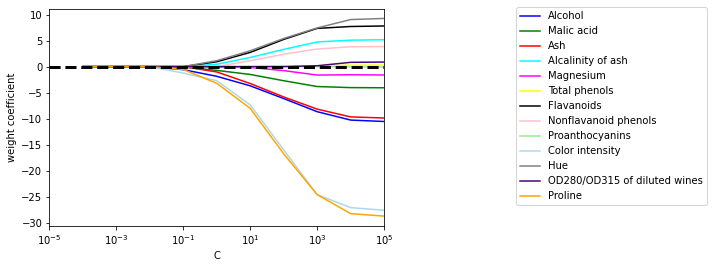

In [46]:
fig = plt.figure()
ax = plt.subplot(111)
for column,color in zip(range(weight.shape[1]), colors):
  plt.plot(prarams,weight[:, column], label =  wine.columns[column+1], color = color  )  
plt.axhline(0,color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend()
ax.legend(
    bbox_to_anchor = (1.38,1.03),
    ncol =1, fancybox=True
)
plt.show()

In [41]:
wine.columns

Index(['target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

랜덤포레스트를 이용한 중요도 

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
forest = RandomForestClassifier(n_estimators=500,random_state=1)

In [50]:
# 학습
forest.fit(x_train, y_train)
# 피처의 중요도 출력
forest.feature_importances_

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [51]:
forest.feature_names_in_

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'], dtype=object)

In [70]:
importances_x = forest.feature_names_in_[ np.argsort(forest.feature_importances_)[::-1] ]
importances_x

array(['Proline', 'Flavanoids', 'Color intensity',
       'OD280/OD315 of diluted wines', 'Alcohol', 'Hue', 'Total phenols',
       'Magnesium', 'Malic acid', 'Proanthocyanins', 'Alcalinity of ash',
       'Nonflavanoid phenols', 'Ash'], dtype=object)

In [71]:
importances_y = np.sort(forest.feature_importances_)[::-1]

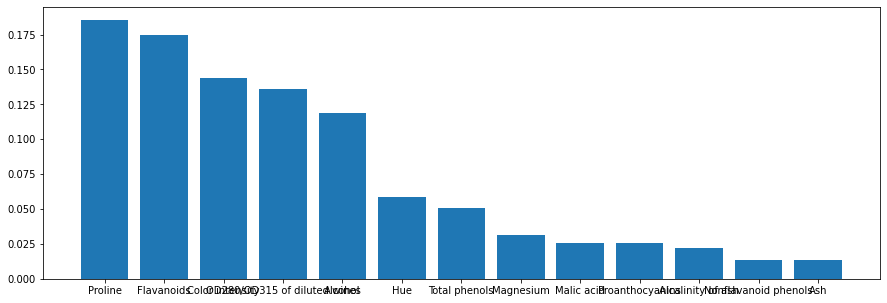

In [77]:
plt.figure(figsize=(15,5))
plt.bar(importances_x,importances_y)
plt.show()

차원축소 : PCA

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=2)
lr = LogisticRegression(random_state=1)

In [81]:
# 데이터는 표준화(Standard or Robustic)
pca.fit(x_train_r)
x_train_pca = pca.transform(x_train_r)
x_test_pca = pca.transform(x_test_r)

In [87]:
lr.fit(x_train_pca,y_train)
lr.score(x_train_pca,y_train), lr.score(x_test_pca,y_test)

(0.9354838709677419, 0.9259259259259259)

In [91]:
# 단일 신경망에 wine 데이터를 분류
# 머신러닝
# 모델 - fit - score -predict
# 인공신경망(퍼셉트론)
# (Dense -  Sequence - compile) - fit - evaluate - predict

In [92]:
x_train_pca.shape

(124, 2)

In [93]:
import tensorflow as tf

In [148]:
# dense = tf.keras.layers.Dense(3,activation='softmax', input_shape = (x_train_pca.shape[1],) )
# model = tf.keras.Sequential( [dense] )

dense1 = tf.keras.layers.Dense(10,activation='sigmoid', input_shape = (x_train_pca.shape[1],) )
# dense2 = tf.keras.layers.Dense(5,activation='sigmoid',  )
dense3 = tf.keras.layers.Dense(3,activation='softmax' )
model = tf.keras.Sequential( [dense1,dense3] )

model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [149]:
y_train_map = y_train.map({
    1:0,
    2:1,
    3:2
})

In [150]:
model.fit(x_train_pca,y_train_map, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1158 - accuracy: 0.4032
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1007 - accuracy: 0.3952
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0908 - accuracy: 0.4032
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0814 - accuracy: 0.3952
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0741 - accuracy: 0.3952
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0665 - accuracy: 0.3952
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0590 - accuracy: 0.3952
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0519 - accuracy: 0.3952
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0455 - accuracy: 0.4032
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0384 - accuracy: 0.4194
Epoch 11/100
4/4 [===========

In [151]:
y_test_map = y_test.map({
    1:0,
    2:1,
    3:2
})
model.evaluate(x_test_pca,y_test_map)

2/2 [==============================] - 0s 7ms/step - loss: 0.5503 - accuracy: 0.9259


[0.5503196120262146, 0.9259259104728699]

인공신경망의 dense층을 여러개 사용->심층 신경망
  - 신경망의 갯수 : 조정에 의해서 성능이 좌우되는 하이퍼 파라메터에 해당
  - 방대한 대이터 및 특성을 학습할때 뛰어난 성능